In [1]:
%pylab inline




Populating the interactive namespace from numpy and matplotlib


In [21]:
from scipy import linalg as la
tf=0.24*2*pi
xif=2.0
xii=1.0
MaxReach=20.0
points_x=151
points_t=points_x**2 /2
#points_t=10000
x=linspace(-MaxReach/sqrt(xif),MaxReach/sqrt(xif),points_x) #debe tener un numero impar de elemntos para que sirva NInteg
t=linspace(0,tf,points_t)
dx=(MaxReach/sqrt(xif)-(-MaxReach/sqrt(xif)))/(points_x*1.0)
dt=tf/points_t

def kt(t):
    return (1 - eta(t))*xii + eta(t)*xii

def VT(x,t):
    return 0.0*kt(t)*x**2

/Users/Felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


In [22]:
#functions
def psi2(x):
    L=(MaxReach/sqrt(xif)-(-MaxReach/sqrt(xif)))
    return sqrt(2/L)*sin(pi*(x+MaxReach/sqrt(xif))/L)

##boundary condditions for the states
def psi(x):
    return sqrt(2)*(pi**(-1.0/4.0))*exp(-(x**2)/2.0)
def psiI(x):
    return (xii**(1.0/4.0))*psi(sqrt(xii)*x)

def psiF(x):
    return (xif**(1.0/4.0))*psi(sqrt(xif)*x)
    #return x*psiI(x)/sqrt(2)

##interpolating function
def eta(t):
    return ((t**3.0)/(tf**3.0))*(1 + 3.0*(1 - (t/tf)) + 6.0*(1 - (t/tf))**2.0)

##Time dependent Density
def rho(x,t):
    rho0=(1 - eta(t))*psiI(x) + eta(t)*psiF(x) 
    Z=trapz(rho0**2)*dx
    return rho0/sqrt(Z)


##energy terms change if the wave functions are not gaussian 
def phi(t):
        return (t/tf)*(1 - (t/tf))*((0.5*xif + 0.5*xii)*t - 0.5*xii*tf)
    
def VI(x):
    return 0.5*(xii**2)*x**2

def VF(x):
    return 0.5*(xif**2)*x**2

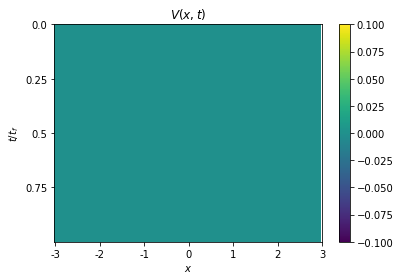

In [23]:
bounds=1


VTgrid=array([VT(x,tau) for tau in t] )
plt.imshow(VTgrid[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title(r'$V(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(VTgrid)[1]-2*bounds+1),(shape(VTgrid)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(VTgrid)[0],shape(VTgrid)[0]/4.0),linspace(0,1,5))
plt.colorbar()

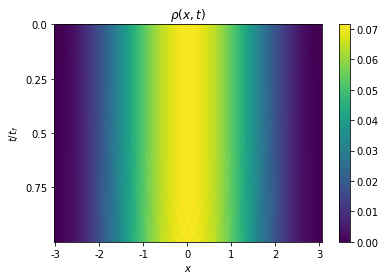

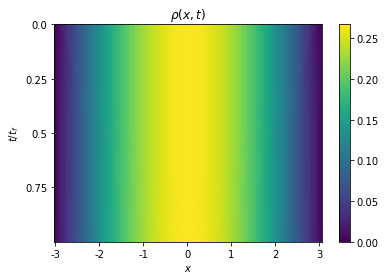

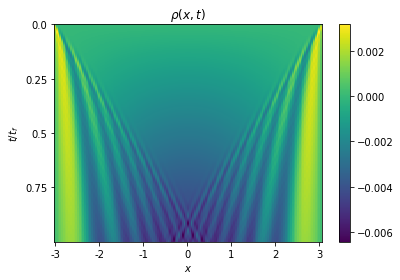

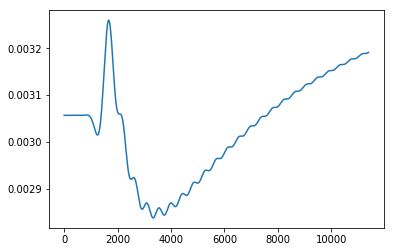

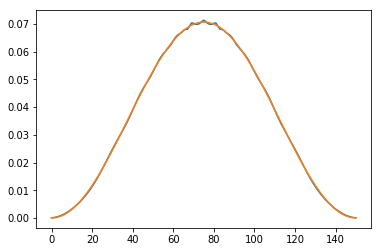

In [24]:
psigrid=[]
norm=[]
liminf=-MaxReach/sqrt(xif)
limsup=MaxReach/sqrt(xif)
psigrid.append(psi2(x))
onesies=np.diag(np.ones(points_x))
T=-0.5*(-2.0*np.diag(np.ones(points_x))+np.diag(np.ones(points_x-1),1)
        +np.diag(np.ones(points_x-1),-1))/(dx**2)
for i in range(0,size(t)-1):
    psipres=psigrid[i]
    psinew=zeros(size(x))
    #T=-0.5*Nderivat2(psipres,x)
    
    
    V=np.diag(VTgrid[i])
    Hpsi=T+V
    matt=onesies-1j*Hpsi*dt
    mattinv=la.pinv(onesies +1j*Hpsi*dt)
    psinew=mattinv@(matt@psipres)
    
    #psinew/=Ninteg(x,abs(conjugate(psinew)*psinew),[liminf],[limsup],dx)
    #norm.append(Ninteg(x,abs(conjugate(psinew)*psinew),[liminf],[limsup],dx))
    psigrid.append(psinew)

    plt.show()

imshow(abs(conjugate(psigrid)*array(psigrid)), interpolation='nearest',aspect='auto')
plt.title(r'$\rho(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(VTgrid)[1]-2*bounds+1),(shape(VTgrid)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(VTgrid)[0],shape(VTgrid)[0]/4.0),linspace(0,1,5))
plt.colorbar()
show()


imshow(real(array(psigrid)), interpolation='nearest',aspect='auto')
plt.title(r'$\rho(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(VTgrid)[1]-2*bounds+1),(shape(VTgrid)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(VTgrid)[0],shape(VTgrid)[0]/4.0),linspace(0,1,5))
plt.colorbar()
show()



imshow(imag(array(psigrid)), interpolation='nearest',aspect='auto')
plt.title(r'$\rho(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(VTgrid)[1]-2*bounds+1),(shape(VTgrid)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(VTgrid)[0],shape(VTgrid)[0]/4.0),linspace(0,1,5))
plt.colorbar()
show()


plot( abs(conjugate(psigrid)*array(psigrid)).T[10])
show()
plot(abs(conjugate(psigrid)*array(psigrid))[size(t)-1])
plot(abs(conjugate(psigrid)*array(psigrid))[0])
plot(psi2(x)**2)
show()



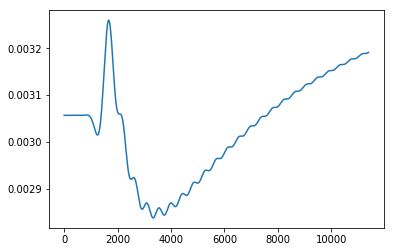

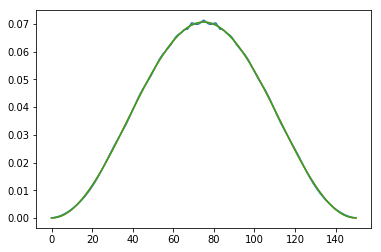

In [29]:
plot( abs(conjugate(psigrid)*array(psigrid)).T[10])
show()
plot(abs(conjugate(psigrid)*array(psigrid))[size(t)-1])
plot(abs(conjugate(psigrid)*array(psigrid))[0])
plot(psi2(x)**2)
show()

/Users/Felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


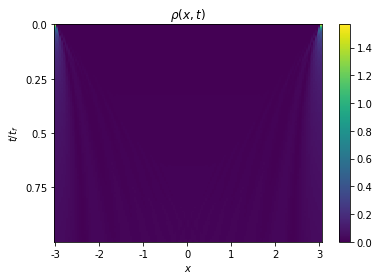

In [25]:
imshow(arctan(abs(imag(array(psigrid))/real(array(psigrid)))), interpolation='nearest',aspect='auto')
plt.title(r'$\rho(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(VTgrid)[1]-2*bounds+1),(shape(VTgrid)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(VTgrid)[0],shape(VTgrid)[0]/4.0),linspace(0,1,5))
plt.colorbar()
show()

/Users/Felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


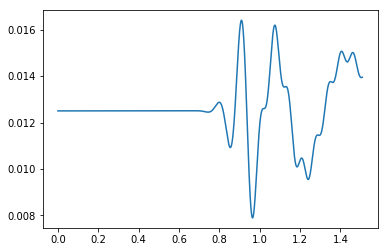

/Users/Felipe/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


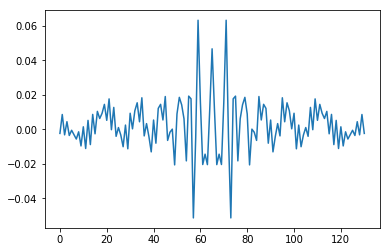

In [27]:
plot(t,arctan(abs(imag(array(psigrid))/real(array(psigrid)))).T[100]/t)
show()

plot(0.5*((Hpsi@psinew)/psinew )[10:-10])